## Importing Required Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

### Data Ingestion and Preprocessing

In [56]:
data =pd.read_csv("/content/car data.csv")

In [57]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [58]:
# Checking null values
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [59]:
# Overall info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [60]:
# show values counts
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#### Data preprocessing

In [61]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [62]:
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [63]:
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [64]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [65]:
# Selecting x and y variable

x =data.drop(['Car_Name','Selling_Price'],axis=1)
y =data['Selling_Price']

In [66]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [67]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [68]:
# Split into train test

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.1,random_state =2)

print(x.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


### Linear regression model

In [69]:
lin_model = LinearRegression()

In [70]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [71]:
# prediction on Training data
training_data_prediction = lin_model.predict(x_train)

In [72]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


### Visualization

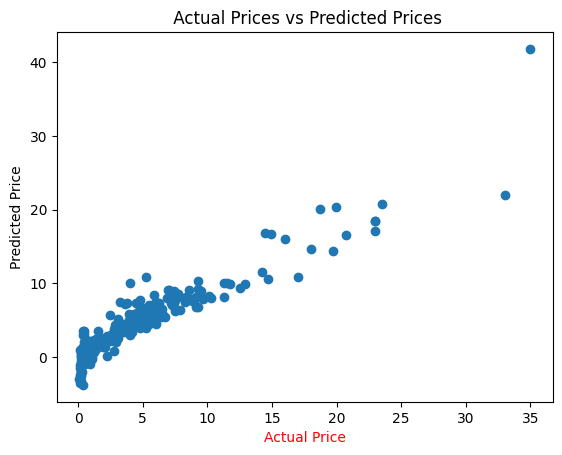

In [73]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price" ,color="red")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Prediction on test data

In [74]:
test_data_prediction = lin_model.predict(x_test)

In [75]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


### Visualization

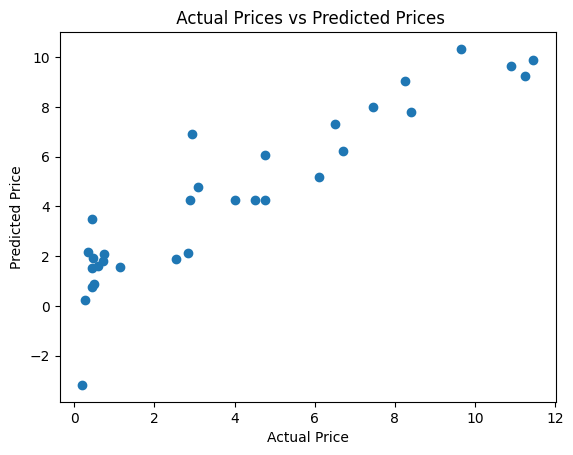

In [76]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## Lasso Regression

In [77]:
lasso_model = Lasso()

In [78]:
lasso_model.fit(x_train,y_train)

Lasso()

### Prediction on train data

In [79]:
pred_on_training_data = lasso_model.predict(x_train)

In [80]:
error_score = metrics.r2_score(y_train,pred_on_training_data)

In [81]:
print("R2 Score is : ",error_score)

R2 Score is :  0.8427856123435794


### Visualization

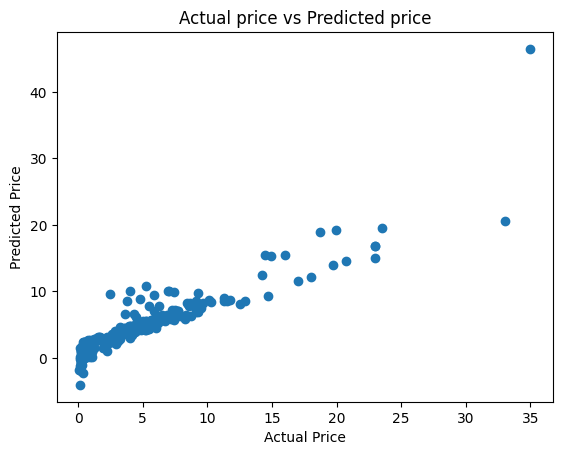

In [82]:
plt.scatter(y_train,pred_on_training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual price vs Predicted price")
plt.show()

### Prediction on test data

In [83]:
test_data_pred = lasso_model.predict(x_test)

In [84]:
err_score = metrics.r2_score(y_test,test_data_pred)

In [85]:
print("R2 Score of test data : ",err_score)

R2 Score of test data :  0.8709167941173195


### Visualization

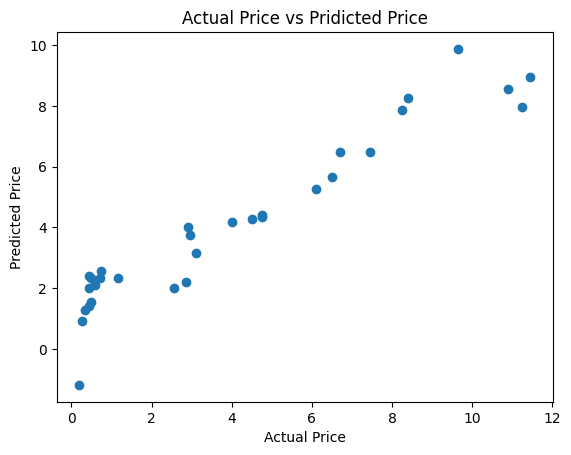

In [86]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Pridicted Price")
plt.show()

In [87]:
data.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
147,Yamaha FZ S V 2.0,2015,0.55,0.840,58000,0,1,0,0
108,Royal Enfield Thunder 350,2016,1.20,1.500,18000,0,1,0,0
175,Hero Honda CBZ extreme,2011,0.38,0.787,75000,0,1,0,0
73,etios liva,2011,2.65,5.710,43000,0,0,0,0
31,ritz,2011,2.35,4.890,54200,0,0,0,0


### Predictive system based on lasso regression

In [88]:
input = (2015,10.38,51000,1,0,0,0)

np_arr = np.asarray(input)

data =np_arr.reshape(1,-1)

prediction =lasso_model.predict(data)

print("Selling Price : ",prediction)


Selling Price :  [6.44421824]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


### Predictive system based on linear regression

In [89]:
input = (2015,10.38,51000,1,0,0,0)

np_arr = np.asarray(input)

data =np_arr.reshape(1,-1)

prediction =lin_model.predict(data)

print("Selling Price : ",prediction)


Selling Price :  [7.95149024]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
